In [1]:
import pandas as pd
import geopandas as geopd

In [2]:
path_to_data = geopd.datasets.get_path("nybb")
gdf = geopd.read_file(path_to_data)

gdf

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [3]:
gdf.dtypes

BoroCode         int64
BoroName        object
Shape_Leng     float64
Shape_Area     float64
geometry      geometry
dtype: object

In [4]:
gdf = gdf.set_index("BoroName") # setting boro names as index.

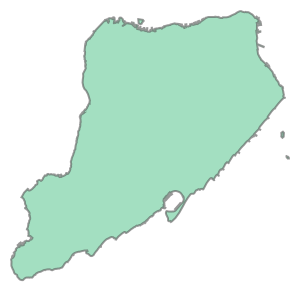

In [5]:
gdf.geometry[0] # example of the geometry of Staten Island

We currently only have multipolygons for our geometry. We can get the boundary of each polygon (LineString).

In [6]:
# using GeoDataFrame.boundary to get line string.
gdf['boundary'] = gdf.boundary
gdf.head()

,BoroCode,Shape_Leng,Shape_Area,geometry,boundary
BoroName,,,,,
Staten Island,5,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227....","MULTILINESTRING ((970217.022 145643.332, 97022..."
Queens,4,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957...","MULTILINESTRING ((1029606.077 156073.814, 1029..."
Brooklyn,3,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100...","MULTILINESTRING ((1021176.479 151374.797, 1021..."
Manhattan,1,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940....","MULTILINESTRING ((981219.056 188655.316, 98094..."
Bronx,2,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278...","MULTILINESTRING ((1012821.806 229228.265, 1012..."


Now we can measure the distance between different boros (or as we can call them 'nodes') by assigning centroids.

In [7]:
# get the centroid, or 'cartesian coordinates' of each boro.
gdf['centroid'] = gdf.centroid

In [8]:
gdf.head()

,BoroCode,Shape_Leng,Shape_Area,geometry,boundary,centroid
BoroName,,,,,,
Staten Island,5,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227....","MULTILINESTRING ((970217.022 145643.332, 97022...",POINT (941639.450 150931.991)
Queens,4,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957...","MULTILINESTRING ((1029606.077 156073.814, 1029...",POINT (1034578.078 197116.604)
Brooklyn,3,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100...","MULTILINESTRING ((1021176.479 151374.797, 1021...",POINT (998769.115 174169.761)
Manhattan,1,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940....","MULTILINESTRING ((981219.056 188655.316, 98094...",POINT (993336.965 222451.437)
Bronx,2,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278...","MULTILINESTRING ((1012821.806 229228.265, 1012...",POINT (1021174.790 249937.980)


Using the new centroids, we can compute distances between each centroid.

In [9]:
# first let's take a starting point as an example.
first_point = gdf['centroid'].iloc[0]
# compute the distance of each centroid from first point.
gdf['distance'] = gdf['centroid'].distance(first_point)
gdf.head()

,BoroCode,Shape_Leng,Shape_Area,geometry,boundary,centroid,distance
BoroName,,,,,,,
Staten Island,5,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227....","MULTILINESTRING ((970217.022 145643.332, 97022...",POINT (941639.450 150931.991),0.000000
Queens,4,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957...","MULTILINESTRING ((1029606.077 156073.814, 1029...",POINT (1034578.078 197116.604),103781.535276
Brooklyn,3,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100...","MULTILINESTRING ((1021176.479 151374.797, 1021...",POINT (998769.115 174169.761),61674.893421
Manhattan,1,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940....","MULTILINESTRING ((981219.056 188655.316, 98094...",POINT (993336.965 222451.437),88247.742789
Bronx,2,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278...","MULTILINESTRING ((1012821.806 229228.265, 1012...",POINT (1021174.790 249937.980),126996.283623


#### Plotting a map using geopandas

<AxesSubplot:>

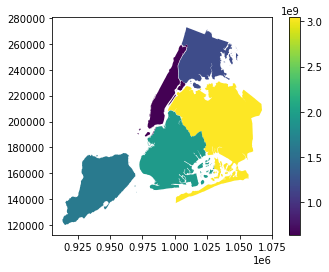

In [10]:
gdf.plot("Shape_Area", legend=True)

<AxesSubplot:>

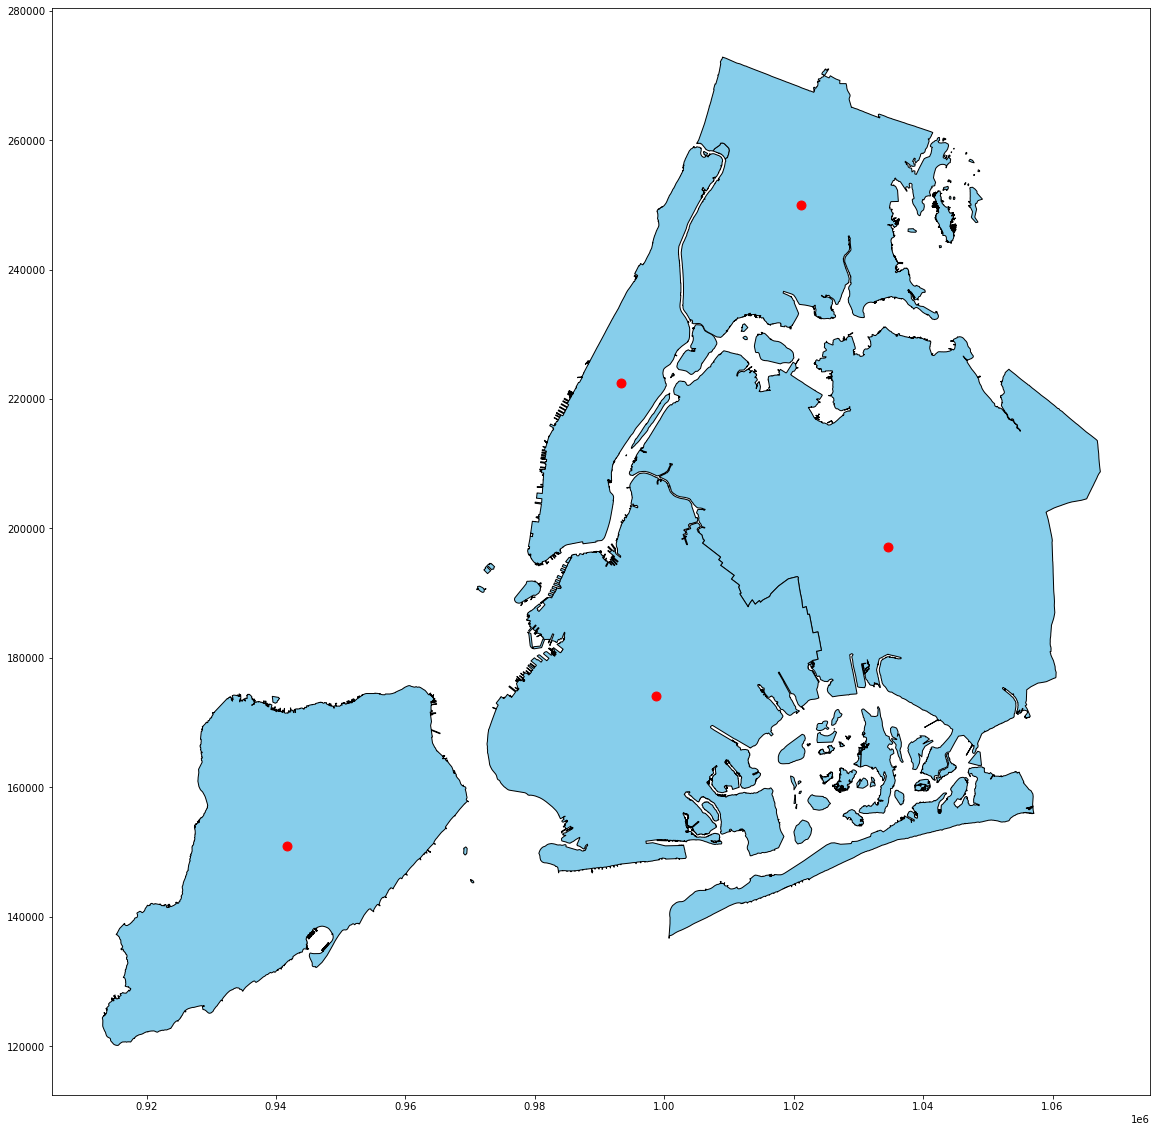

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(20,20))

network = gdf.geometry.plot(ax=ax, color='skyblue', edgecolor='black')
centroids = gdf.centroid.to_crs(gdf.crs)

centroids.plot(ax=network, marker='o', color='red', markersize=80)

##### Generate Distances between Nodes
We will take the assumption that they are all connected to one another. This will act as the OD matrix.

In [12]:
import numpy as np

n_centroids = gdf.shape[0]
OD_matrix = np.zeros([n_centroids, n_centroids])

In [13]:
for i in range(0, n_centroids):
    centroid_point = gdf.centroid[i]
    OD_matrix[:,i] = gdf.centroid.distance(centroid_point)    

In [14]:
columns = list(gdf.index)

OD_matrix_df = pd.DataFrame(data=OD_matrix, columns=columns)
OD_matrix_df.index = OD_matrix_df.columns
OD_matrix_df

,Staten Island,Queens,Brooklyn,Manhattan,Bronx
Staten Island,0.000000,103781.535276,61674.893421,88247.742789,126996.283623
Queens,103781.535276,0.000000,42530.453904,48401.272479,54495.374959
Brooklyn,61674.893421,42530.453904,0.000000,48586.299386,79011.627866
Manhattan,88247.742789,48401.272479,48586.299386,0.000000,39121.024479
Bronx,126996.283623,54495.374959,79011.627866,39121.024479,0.000000


### Charging Station Location Optimization Model Formulation

Consider the AC-PC model presented in: https://www.sciencedirect.com/science/article/pii/S0377221712008855

The AC - PC model is as follows:

Maximize: 
(1)                $$\sum_{q \in Q}f_q y_q$$ 

s.t.  (2)          $$\sum_{i \in K_{j,k}^{q}}z_i \leq y_q$$ $$ \forall q \in Q, a_{j,k} \in A_{q} $$

(3)                $$ \sum_i z_i = p $$

(4)                $$ y_q, z_i \in {0,1}, \forall q \in Q, i \in N $$


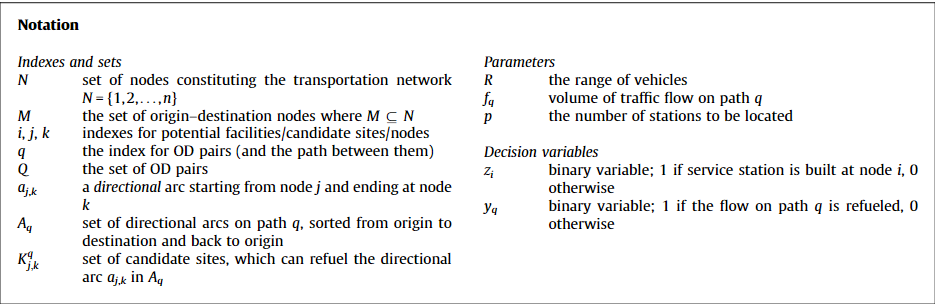

In [15]:
from pyscipopt import Model, quicksum

def AcPc(N, Q, K, f, p):
    model = Model("AcPc")
    z, y = {}, {}
    
    # add the decision variables
    for q in range(0, len(Q)):        
        y[q] = model.addVar(vtype="B", name="y(%s)"%q)
    for i in range(0, N):
        z[i] = model.addVar(vtype="B", name="z(%s)"%i)
    
    
    # Constraints
    for q in range(0, len(Q)):
        try:
            model.addCons(quicksum(z[i] for i in K[q]) <= y[q], "Arc Constraint")
        except:
            pass

    model.addCons(quicksum(z[i] for i in range(0, N)) == p, "N. Facilities")
    
    model.setObjective(
        quicksum(f[q] * y[q] for q in range(0, len(Q))),
        "maximize")
    
    model.data = z,y
    return model
    

###### In this particular set-up we have:

1) Set of nodes constituting the transportation network = set of origin-destination notes.

2) All nodes are potential facilities/candidate sites.

3) The index q for OD pairs will embed nodes i,j belogning to the path q.

4) The directional arc a<sub>j,k</sub> and therefore the set of directional arcs on path q, A<sub>q</sub> here is trivial as each node connects to every other node as an OD pair and therefore a path q, will be equivalent to a<sub>j,k</sub>.

5) Given (4), the set of candidate sites which can refuel the directional arc a<sub>j,k</sub> in A<sub>q</sub> will simply be D<sub>q</sub> - R, where D<sub>q</sub> is the distance of path q.

6) R - the range of vehicles will be provided in distance (same unit as OD distances)

7) f<sub>q</sub> will be a matrix the same size as OD, except the values will generated using the gravity model. 

8) Here, p will be fixed at a constant value, p=2, say.

9) Decision variables are what the model will estimate.

###### The assumptions above gives a 'dense' or fully-connected nodal network of OD, where each node represents a boro in New York.

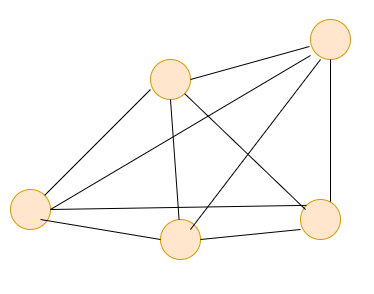

### Working with some data on the model

###### Generating Traffic flow

Given the limitation of the current data, we can generate traffic flow using O'Kelly's (1989) gravity model:

$$f_q = \frac{P_{q}^{O} P_{q}^{D}}{D_{q}^{2}} $$

where $$ P_q^{O} (P_q^{D}) $$ is randomly generated (uniform distribution) population of origin-destination nodes and D<sub>q</sub> is the length of the shortest path between OD pair. 

Here, we can do away with the random assumption and simply assign, to each node (state) their actual population.

In [16]:
populations = {'Staten Island': 457596, 'Queens': 2271000, 'Brooklyn': 2577000, 'Manhattan': 1629000, 'Bronx': 1427000}

In [17]:
def gravity_model(p1, p2, d) -> float:
    mul = p1*p2
    fq = mul/d**2
    return fq

In [18]:
populations = np.array(list(populations.values()))

In [19]:
# applying gravity model
fq_matrix = np.zeros([n_centroids, n_centroids], dtype='float64')
with np.errstate(divide='ignore'):
    fq_matrix = np.outer(populations/10, populations/10) / (OD_matrix**2)
    fq_matrix

In [20]:
from numpy import inf

fq_matrix[fq_matrix == inf] = 0
fq_matrix

array([[ 0.        ,  0.9648486 ,  3.10012941,  0.95718546,  0.40487799],
       [ 0.9648486 ,  0.        , 32.35426344, 15.79154636, 10.9124387 ],
       [ 3.10012941, 32.35426344,  0.        , 17.7831159 ,  5.89055713],
       [ 0.95718546, 15.79154636, 17.7831159 ,  0.        , 15.1888404 ],
       [ 0.40487799, 10.9124387 ,  5.89055713, 15.1888404 ,  0.        ]])

In [21]:
fq_matrix_df = pd.DataFrame(data=fq_matrix, columns=columns)
fq_matrix_df.index = columns
fq_matrix_df

,Staten Island,Queens,Brooklyn,Manhattan,Bronx
Staten Island,0.000000,0.964849,3.100129,0.957185,0.404878
Queens,0.964849,0.000000,32.354263,15.791546,10.912439
Brooklyn,3.100129,32.354263,0.000000,17.783116,5.890557
Manhattan,0.957185,15.791546,17.783116,0.000000,15.188840
Bronx,0.404878,10.912439,5.890557,15.188840,0.000000


In [22]:
print(fq_matrix_df.sum(axis=0))

Staten Island     5.427041
Queens           60.023097
Brooklyn         59.128066
Manhattan        49.720688
Bronx            32.396714
dtype: float64


##### Setting up the data for the following example.

In [23]:
# assigning nodes to their index values. Will need this later.
node_idx = {}  
for i in range(0, n_centroids):
    node_idx[i] = gdf.index[i]

node_idx

{0: 'Staten Island', 1: 'Queens', 2: 'Brooklyn', 3: 'Manhattan', 4: 'Bronx'}

Getting the Data prepared in a format that can be fed to the model.

In [24]:
R = int(OD_matrix.max()) - int(OD_matrix.mean())# the range of vehicles
N = OD_matrix.shape[0]
p = 2 # number of CS to be built
Q = OD_matrix.reshape(1, OD_matrix.shape[0]**2)[0]
f = fq_matrix.reshape(1, fq_matrix.shape[0]**2)[0]

Here the 'cover set', K<super>q</super><sub>j,k</sub> would need to be generated. For this particular case, as a path q is the same as an arc a<sub>j,k</sub>, we can simply generate this set by checking to see if OD<sub>q</sub> - R > 0 (i.e. if the range of vehicle can complete the OD<sub>q</sub> path journey). Where a path, q, is composed of multiple nodes j,k and arcs between those nodes, a<sub>j,k</sub>, the satisfying condition would have to be any a<sub>j,k</sub> > R, for each path, q. 

In [25]:
A = []
for i in range(0, len(OD_matrix[0,:])):
    for j in range(0, len(OD_matrix[:,0])):
        A.append([i,j])

A_Q = {}
for q in range(0, len(Q)):
    A_Q[q] = A[q]

K = {}
for i,q in enumerate(A_Q):
    if Q[i] - R > 0:
        K[i] = A_Q[i]

print(K)

{1: [0, 1], 3: [0, 3], 4: [0, 4], 5: [1, 0], 14: [2, 4], 15: [3, 0], 20: [4, 0], 22: [4, 2]}


In [26]:
print(R)
print(Q[1], Q[3])

71569
103781.53527578666 88247.74278873476


##### Solving the problem

In [27]:
model = AcPc(N, Q, K, f, p)
model.optimize()
z,y = model.data
facilities_idx = [i for i in z if model.getVal(z[i]) > 0] 

In [29]:
facilities_idx

[2, 3]

In [28]:
facilities = []
for idx in facilities_idx:
    facilities.append(node_idx[idx])

print(facilities)

['Brooklyn', 'Manhattan']
